In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [4]:
def get_rank(arquivo):
    df_conhecimento = pd.read_csv(arquivo)
    # Criando classificador RF
    rf_clas = RandomForestClassifier(n_jobs=8, n_estimators=100, max_features=5, random_state=0, max_depth=3, min_samples_split=5)
    rf_clas.fit(df_conhecimento[colunas_stats], df_conhecimento.verifica)
    
    # Criando rank colunas
    df_rank = pd.DataFrame(sorted(list(zip(colunas_stats,rf_clas.feature_importances_)), key=lambda x: x[1], reverse=True))
    
    # Divide colunas em 2 grupos
    dados = df_rank[[1]].values
    kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, n_jobs=8)
    kmeans = kmeans.fit(dados)
    labels = kmeans.predict(dados)
    df_rank['labels'] = labels
    
    # Utiliza somente o grupo colunas mais relevante
    label_grupo_bom = df_rank[df_rank[1]==df_rank[1].max()].labels.values[0]
    melhores_colunas = df_rank[df_rank['labels']==label_grupo_bom][0]
    
    # saidas
    print('Melhores colunas', melhores_colunas.values.tolist())
    df_rank.plot.bar(x=0, y=1, figsize=(12,5))
    return df_rank

Melhores colunas ['nbrl', 'medianb5']


,0,1,labels
0,nbrl,0.398085,1
1,medianb5,0.373233,1
2,ndvi,0.090504,0
3,medianb6,0.058376,0
4,medianb3,0.054078,0
5,medianb2,0.020033,0
6,medianb7,0.004368,0
7,dif_ndvi,0.001236,0
8,dif_dnbrl,0.000047,0
9,medianb4,0.000039,0


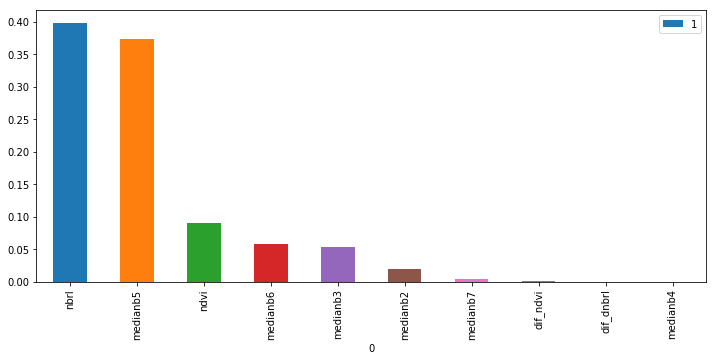

In [5]:
get_rank('conhecimento.csv')

Melhores colunas ['medianb5', 'medianb2', 'nbrl']


,0,1,labels
0,medianb5,0.402423,0
1,medianb2,0.227173,0
2,nbrl,0.192400,0
3,medianb3,0.101243,1
4,ndvi,0.033855,1
5,medianb4,0.019049,1
6,medianb6,0.011827,1
7,dif_ndvi,0.007331,1
8,medianb7,0.004197,1
9,dif_dnbrl,0.000502,1


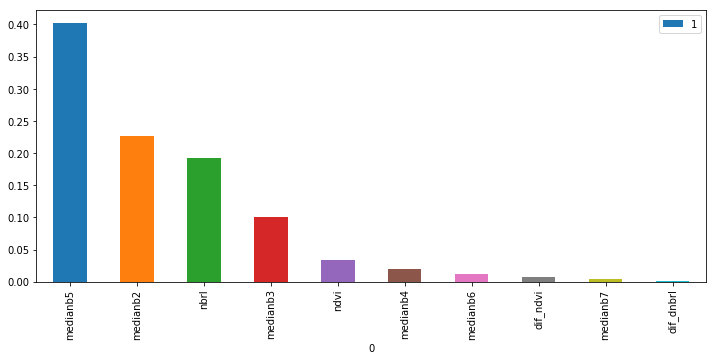

In [6]:
get_rank('arquivos_testes/conhecimento_221067.csv')

Melhores colunas ['nbrl', 'medianb5']


,0,1,labels
0,nbrl,0.509092,1
1,medianb5,0.282049,1
2,ndvi,0.119424,0
3,medianb3,0.038216,0
4,medianb2,0.024652,0
5,medianb6,0.015931,0
6,medianb7,0.005128,0
7,dif_ndvi,0.004465,0
8,medianb4,0.000978,0
9,dif_dnbrl,0.000067,0


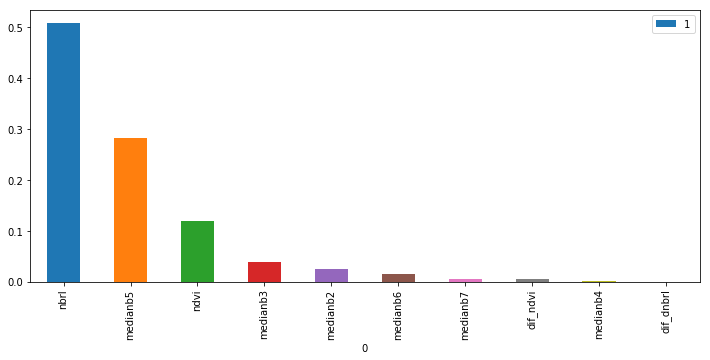

In [7]:
get_rank('arquivos_testes/conhecimento_221074.csv')

Melhores colunas ['medianb6', 'medianb5']


,0,1,labels
0,medianb6,0.520863,1
1,medianb5,0.242552,1
2,nbrl,0.060015,0
3,medianb7,0.057647,0
4,ndvi,0.042607,0
5,medianb4,0.024880,0
6,dif_dnbrl,0.020085,0
7,dif_ndvi,0.015524,0
8,medianb2,0.010450,0
9,medianb3,0.005378,0


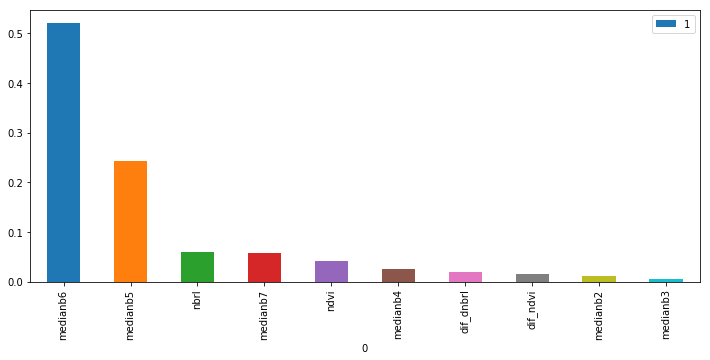

In [8]:
get_rank('arquivos_testes/conhecimento_226070.csv')